In [1]:
import numpy as np
import keras
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
from quantum.util.dataset_creator import create_dataset

from qrnn import QRNN, dtype_global
from matplotlib import pyplot as plt


In [2]:
X, y = create_dataset(tf.sin, sample_count=100, dtype=dtype_global, end=6*np.pi)
dataset = tf.data.Dataset.from_tensor_slices((X, y))

dataset = dataset.shuffle(buffer_size=1000)  # Shuffle the data
dataset = dataset.batch(100)                 # Batch size of 32
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)  # Prefetch for performance

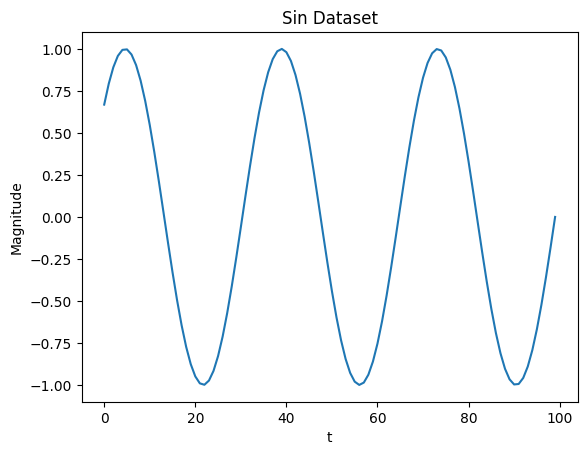

In [3]:
plt.plot(y)
plt.title("Sin Dataset")
plt.xlabel('t')
plt.ylabel('Magnitude')
plt.show()

In [4]:
model = tf.keras.Sequential([QRNN(units=1, wires=3, layers=1, return_sequences=False)])
optimizer = tf.keras.optimizers.Adam(learning_rate=.05)

model.compile(optimizer=optimizer, loss='mse')
history_q = model.fit(dataset, epochs=300, callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2),)

Epoch 1/300


AttributeError: Exception encountered when calling layer 'keras_layer' (type KerasLayer).

'list' object has no attribute 'shape'

Call arguments received by layer 'keras_layer' (type KerasLayer):
  • inputs=['tf.Tensor(shape=(100, 3), dtype=float32)', 'None']

In [ ]:
metrics = history_q.history
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(history_q.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch')
plt.ylabel('Loss [CrossEntropy]')

plt.subplot(1,2,2)
plt.plot(history_q.epoch, 100*np.array(metrics['accuracy']), 100*np.array(metrics['val_accuracy']))
plt.legend(['accuracy', 'val_accuracy'])
plt.ylim([0, 100])
plt.xlabel('Epoch')
plt.ylabel('Accuracy [%]')